## Naive Bayes Record Data

Within this tab I will provide my code, explanation and analysis for my naive bayes gaussian machine learning model. I ultimately decided to add a seventh variable to my dataset. This variable is the percentage of policy in a country in a specific year specifically relating to ocean sustainability. I had to clean and tidy this data. You can find this [here](//Users/kendallgilbert/dsan-5000-project-kendallgilbert180/dsan-website/5000-website/codes/02-data-cleaning/cleaning_policy.ipynb).

This model aims to explore whether specific variables are good indicators of the extent to which policies relate to the ocean. It can help identify which aspects or attributes of policies are more strongly correlated with ocean-related policies and which are not. If the model performs well, the findings could have the ability inform data-driven decision-making in policy development specifically with regard to ocean sustainability and conservation efforts.

I split the values into five bins to make analysis easier to understand. The first bin is percentages (0,17), the second is (18, 35), the third is (36,53), the fourth is (54, 71) and the fifth is (72, 89). These bins are targets. The features are the variables mpa, inventions, instruments, fishing exports and aquaculture production. 

The analysis has the ability to uncover trends or patterns in policy data that can be used for policy assessment, trend analysis, and making informed recommendations

## Prepping Data for Model

Within this code chunk, the necessary libraris are installed, the data is imported, all columns are set to integers and the country columns is encoded in order for the model to run correctly. 


In [47]:
#Importing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Loading Merged Data
nb_record = pd.read_csv("/Users/kendallgilbert/dsan-5000-project-kendallgilbert180/dsan-website/5000-website/data/01-modified-data/nb_record.csv")

# Encode the "Country" column using LabelEncoder
label_encoder = LabelEncoder()
nb_record['Country'] = label_encoder.fit_transform(nb_record['Country'])

## Splitting Data into Feature and Target Variables

In [48]:
#Creating bins for target
bin_edges = [0, 18, 36, 54, 72, 87]
y_binned = pd.cut(y, bins=bin_edges, labels=False, include_lowest=True)

# Set X to include all features except Value
X = nb_record.drop(['Value'], axis=1)

# Split the data into training and the remaining data
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y_binned, test_size=0.3, random_state=42)

# Split the remaining data into testing and validation sets
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)

## Creating a Gaussian Naive Bayes Classifier 

In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

gnb.fit(X_train, y_train)

GaussianNB()

## Making Predictions and Evaluating Performance

In [50]:
#| code-fold: true
# Make predictions on the testing set
y_test_pred = gnb.predict(X_test)

# Make predictions on the validation set
y_val_pred = gnb.predict(X_val)

# Evaluate the model's performance on the testing set
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", accuracy_test)

# Generate a classification report for more detailed performance metrics on the testing set
classification_report_test = classification_report(y_test, y_test_pred)
print("Testing Classification Report:\n", classification_report_test)

Testing Accuracy: 0.4108527131782946
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.33      0.50        99
           1       0.22      0.69      0.33        13
           2       0.13      1.00      0.23         5
           3       0.11      0.25      0.15         4
           4       0.71      0.62      0.67         8

    accuracy                           0.41       129
   macro avg       0.43      0.58      0.38       129
weighted avg       0.82      0.41      0.47       129



In [51]:
# Evaluate the model's performance on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", accuracy_val)

# Generate a classification report for more detailed performance metrics on the validation set
classification_report_val = classification_report(y_val, y_val_pred)
print("Validation Classification Report:\n", classification_report_val)

Validation Accuracy: 0.5116279069767442
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.46      0.62       105
           1       0.14      0.67      0.24         6
           2       0.11      1.00      0.20         4
           3       0.45      0.83      0.59         6
           4       1.00      0.62      0.77         8

    accuracy                           0.51       129
   macro avg       0.54      0.72      0.48       129
weighted avg       0.89      0.51      0.60       129



## Confusion Matrix

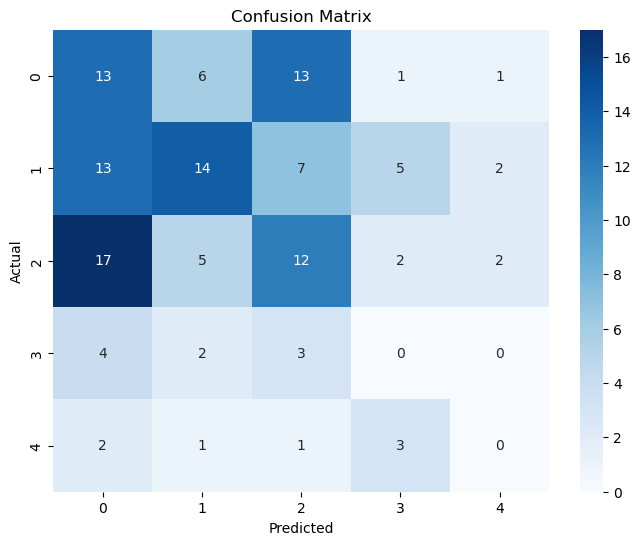

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test_pred, y_val_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Feature Selection

In [62]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Create a SelectKBest object to select the top 'k' features based on a score function (e.g., chi-squared)
k_best = SelectKBest(score_func=chi2, k=2)  # You can adjust 'k' as needed

# Fit the feature selector on the training data
k_best.fit(X_train, y_train)

# Transform the training, testing, and validation data to include only the selected features
X_train_selected = k_best.transform(X_train)
X_test_selected = k_best.transform(X_test)
X_val_selected = k_best.transform(X_val)

# Get the selected features mask
selected_features_mask = k_best.get_support()

# Get the names of the selected features
selected_feature_names = X_train.columns[selected_features_mask]

# Display the selected feature names
print("Selected Features:")
print(selected_feature_names)


Selected Features:
Index(['Aqua Production (Millions)', 'Fishing Exports (Millions)'], dtype='object')


In [60]:
# Now you can train your Gaussian Naive Bayes classifier and evaluate its performance using the selected features
gnb.fit(X_train_selected, y_train)
y_test_pred = gnb.predict(X_test_selected)
y_val_pred = gnb.predict(X_val_selected)

# Calculate the accuracy for the test set
accuracy_test_fs = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", accuracy_test_fs)

# Generate a classification report for more detailed performance metrics on the test set
classification_report_string_fs = classification_report(y_test, y_test_pred)
print("Testing Classification Report:\n", classification_report_string_fs)

accuracy_val_fs = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", accuracy_val_fs)

classification_report_valid = classification_report(y_val, y_val_pred)
print("Testing Classification Report:\n", classification_report_valid)


Testing Accuracy: 0.627906976744186
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.72      0.76        99
           1       0.00      0.00      0.00        13
           2       0.12      0.80      0.22         5
           3       0.00      0.00      0.00         4
           4       0.67      0.75      0.71         8

    accuracy                           0.63       129
   macro avg       0.32      0.45      0.34       129
weighted avg       0.67      0.63      0.63       129

Validation Accuracy: 0.689922480620155
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.77      0.83       105
           1       0.00      0.00      0.00         6
           2       0.12      1.00      0.22         4
           3       0.00      0.00      0.00         6
           4       0.67      0.50      0.57         8

    accuracy                           0.69   

/Users/kendallgilbert/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kendallgilbert/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kendallgilbert/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/